In [2]:
from datetime import date
from nsepy import get_history
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

#!pip install XGBoost

In [3]:
IT = ["3IINFOLTD","63MOONS","ACCELYA","AIRAN","ALLSEC","APTECHT","AURIONPRO","AURUM","BBOX","DUCON","HCL-INSYS","HCLTECH","HEXAWARE","HGS","HOVS","INFOBEAN","INFY","INSPIRISYS","MASTEK","MPHASIS","NEWGEN","OFSS","ONWARDTEC","PALREDTEC","PANACHE","PERSISTENT","QUICKHEAL","RAMCOSYS","REDINGTON",
"RPSGVENT","RSSOFTWARE","RSYSTEMS""SAKSOFT","SASKEN","SONATSOFTW",
"TAKE",
"TANLA",
"TATAELXSI",
"TCS",
"TECHM",
"TERASOFT",
"TREJHARA",
"TRIGYN",
"TVSELECT","VAKRANGEE","WINPRO","WIPRO",
"XCHANGING","XELPMOC",
"ZENSARTECH","ZENTEC"]

l = ["a","b","c","d"]

it = #Sector DF  - Company Name, ROI, Trend, Predicted Closing Price.

for i in l:
    data = get_history(symbol=i,start_date,end_date)

    2015-2022 data is loaded

    pre processing, filling missing na and values and dates

    /* time series, trend, seasonality / 

    neural network

    predicted_value (closing price) next quarter 

    ROI = (predicted_value - latest_date_value)/ (latest_date_value) 100

    it columns #Company Name, ROI, Trend, Predicted Closing Price

5 dataframes like that.


based on BUDGET, SECTOR

front end chooses the dataframe for the SECTOR
BUDGET vechu it's gonna sort

In [4]:
IT_sector=pd.DataFrame()
cols=['Company','ROI']#trend? closing price?


In [5]:
start=date(2015,1,1)
end=date(2023,1,5)

In [6]:
def preprocess(data):
    
    df=pd.date_range(start=start,end=end,freq='D')
    df=pd.DataFrame(df)
    df.columns=['date']
    
    data = pd.merge(data,df,how='right',right_on='date',left_on='Date')
    
    data.set_index(data['date'],inplace=True)
    #data.rename(index={'date':'Date'},inplace=True)
    data.fillna(method='bfill',inplace=True)
    
    #gives daily returns based on close price
    #data['Returns'] = data['Close'].pct_change()
    data['Returns'] = ((data['Close']-data['Open'])/(data['Open']))*100
    
    #removing all columns expect stock returns
    #data.drop(columns=data.columns[:-1],inplace=True)
    data = data.drop(columns=["Symbol","Series","date","High","Low","Last","%Deliverble","Open","Prev Close"])
    
    #removing the null values from the data
    data.dropna(inplace=True)
    
    print(data.head())
    #print(data['Returns'].sum())
    
    
    
    return data

TCS
              Close     VWAP    Volume      Turnover   Trades  \
date                                                            
2015-01-01  2545.55  2548.51  183415.0  4.674345e+13   8002.0   
2015-01-02  2579.45  2568.19  462870.0  1.188740e+14  27585.0   
2015-01-03  2540.25  2563.94  877121.0  2.248886e+14  43234.0   
2015-01-04  2540.25  2563.94  877121.0  2.248886e+14  43234.0   
2015-01-05  2540.25  2563.94  877121.0  2.248886e+14  43234.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01             52870.0 -0.835606  
2015-01-02            309350.0  1.115249  
2015-01-03            456728.0 -1.578845  
2015-01-04            456728.0 -1.578845  
2015-01-05            456728.0 -1.578845  


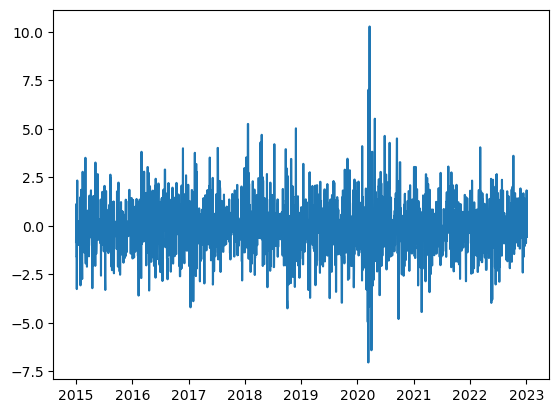

Index(['Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       'Returns'],
      dtype='object')
TAKE
            Close   VWAP    Volume      Turnover  Trades  Deliverable Volume  \
date                                                                           
2015-01-01  56.60  56.67   65433.0  3.708232e+11   502.0             36516.0   
2015-01-02  62.15  60.94  806595.0  4.915669e+12  5322.0            321757.0   
2015-01-03  62.85  63.46  340352.0  2.159713e+12  2147.0            169696.0   
2015-01-04  62.85  63.46  340352.0  2.159713e+12  2147.0            169696.0   
2015-01-05  62.85  63.46  340352.0  2.159713e+12  2147.0            169696.0   

             Returns  
date                  
2015-01-01  1.615799  
2015-01-02  8.369660  
2015-01-03  0.560000  
2015-01-04  0.560000  
2015-01-05  0.560000  


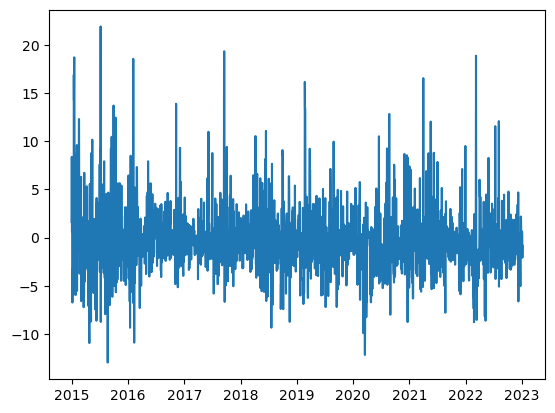

Index(['Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       'Returns'],
      dtype='object')


In [10]:
for i in ["TCS","TAKE"]:
    
    print (i)
    symbol=i
    
    #getting the data from NSE
    data = get_history(symbol=symbol, start=start, end=end)
    #plt.plot(data['Close'])
    
    #making the index of the data to DateTime
    data.index = pd.to_datetime(data.index)
    
    data=preprocess(data)
    
    #data = data.drop(columns = ["date"])
    
    plt.plot(data.index,data["Returns"])
    plt.show()
    
    print(data.columns)

In [11]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor

In [31]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (actual_x.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    #model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    model.add(Dense(units=1))
    
    return model

3IINFOLTD
Empty DataFrame
Columns: [Close, VWAP, Volume, Turnover, Trades, Deliverable Volume, Returns]
Index: []
63MOONS
             Close    VWAP    Volume      Turnover   Trades  \
date                                                          
2015-01-01  212.25  210.53  728251.0  1.533157e+13  12782.0   
2015-01-02  210.10  213.19  648293.0  1.382072e+13  13066.0   
2015-01-03  210.25  211.34  239039.0  5.051856e+12   5821.0   
2015-01-04  210.25  211.34  239039.0  5.051856e+12   5821.0   
2015-01-05  210.25  211.34  239039.0  5.051856e+12   5821.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01            176591.0  4.608181  
2015-01-02            133938.0 -1.407790  
2015-01-03             57477.0 -0.355450  
2015-01-04             57477.0 -0.355450  
2015-01-05             57477.0 -0.355450  
Epoch 1/10
69/69 [==============================] - 5s 10ms/step - loss: 10.7548
Epoch 2/10
69/69 [==============================] - 1s

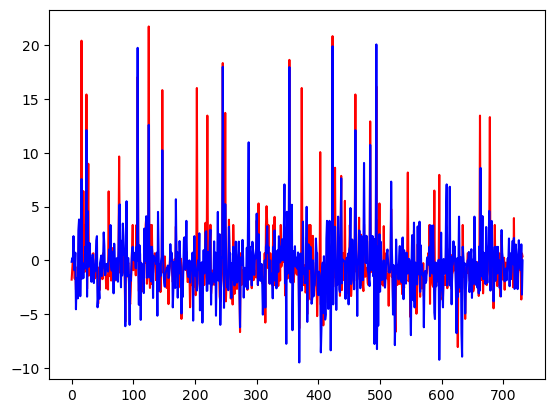

Predicted ROI -1.0758390329397203
Actual ROI -0.31529516994633494
ACCELYA
              Close     VWAP  Volume      Turnover  Trades  \
date                                                         
2015-01-01  1021.85  1014.93  6135.0  6.226621e+11   791.0   
2015-01-02  1006.90  1024.81  8551.0  8.763153e+11   722.0   
2015-01-03  1004.60  1008.03  3846.0  3.876902e+11   483.0   
2015-01-04  1004.60  1008.03  3846.0  3.876902e+11   483.0   
2015-01-05  1004.60  1008.03  3846.0  3.876902e+11   483.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01              3204.0  2.482198  
2015-01-02              4550.0 -3.275696  
2015-01-03              1978.0  0.460000  
2015-01-04              1978.0  0.460000  
2015-01-05              1978.0  0.460000  
Epoch 1/10
69/69 [==============================] - 5s 11ms/step - loss: 4.2535
Epoch 2/10
69/69 [==============================] - 1s 11ms/step - loss: 4.2227
Epoch 3/10
69/69 [============

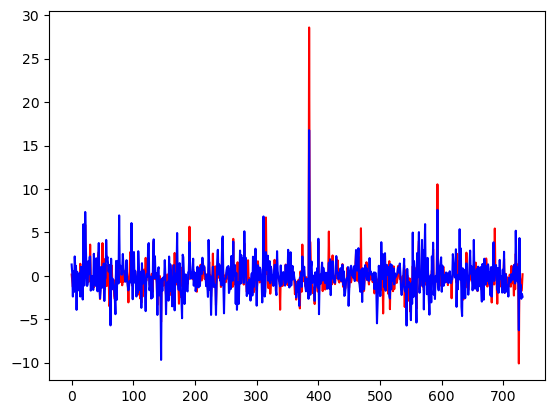

Predicted ROI -0.31161822320809385
Actual ROI -0.17923300320531815
AIRAN
            Close  VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                        
2015-01-01  39.35  40.0  252366  1.009515e+12    1012              126974   
2015-01-02  39.35  40.0  252366  1.009515e+12    1012              126974   
2015-01-03  39.35  40.0  252366  1.009515e+12    1012              126974   
2015-01-04  39.35  40.0  252366  1.009515e+12    1012              126974   
2015-01-05  39.35  40.0  252366  1.009515e+12    1012              126974   

              Returns  
date                   
2015-01-01 -19.693878  
2015-01-02 -19.693878  
2015-01-03 -19.693878  
2015-01-04 -19.693878  
2015-01-05 -19.693878  
Epoch 1/10
69/69 [==============================] - 5s 11ms/step - loss: 198.5440
Epoch 2/10
69/69 [==============================] - 1s 11ms/step - loss: 159.5661
Epoch 3/10
69/69 [==============================] - 1s 

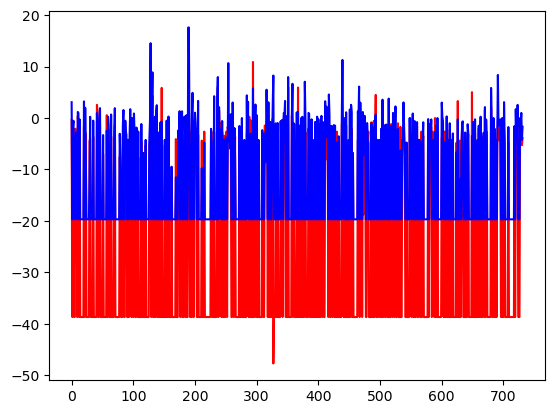

Predicted ROI -38.689025477262774
Actual ROI -19.693877551020407
ALLSEC
            Close   VWAP   Volume      Turnover  Trades  Deliverable Volume  \
date                                                                          
2015-01-01  23.65  23.85   3423.0  8.164760e+09    28.0              3175.0   
2015-01-02  25.35  25.17  35442.0  8.921824e+10   254.0             16780.0   
2015-01-03  26.45  26.37   2211.0  5.831270e+09    30.0              1852.0   
2015-01-04  26.45  26.37   2211.0  5.831270e+09    30.0              1852.0   
2015-01-05  26.45  26.37   2211.0  5.831270e+09    30.0              1852.0   

             Returns  
date                  
2015-01-01 -0.838574  
2015-01-02  5.625000  
2015-01-03  3.725490  
2015-01-04  3.725490  
2015-01-05  3.725490  
Epoch 1/10
69/69 [==============================] - 5s 10ms/step - loss: 12.7555
Epoch 2/10
69/69 [==============================] - 1s 11ms/step - loss: 12.1990
Epoch 3/10
69/69 [==============================] -

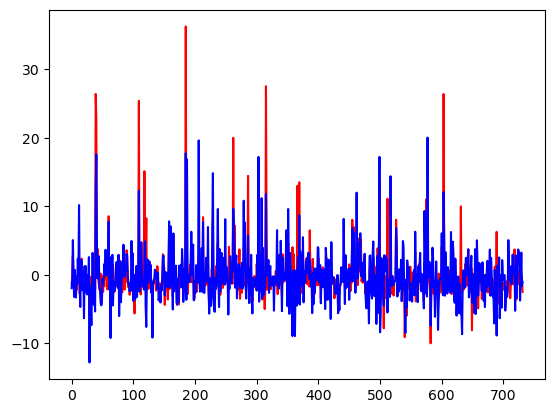

Predicted ROI -0.9766766941148766
Actual ROI -0.5379827188337747
APTECHT
            Close   VWAP    Volume      Turnover  Trades  Deliverable Volume  \
date                                                                           
2015-01-01  71.65  71.69  233579.0  1.674643e+12  1836.0             55058.0   
2015-01-02  72.00  72.43  173009.0  1.253071e+12  1630.0             73178.0   
2015-01-03  72.75  73.25  254959.0  1.867525e+12  2922.0             65151.0   
2015-01-04  72.75  73.25  254959.0  1.867525e+12  2922.0             65151.0   
2015-01-05  72.75  73.25  254959.0  1.867525e+12  2922.0             65151.0   

             Returns  
date                  
2015-01-01  2.357143  
2015-01-02 -0.621118  
2015-01-03  1.393728  
2015-01-04  1.393728  
2015-01-05  1.393728  
Epoch 1/10
69/69 [==============================] - 6s 14ms/step - loss: 10.7229
Epoch 2/10
69/69 [==============================] - 1s 14ms/step - loss: 9.4262
Epoch 3/10
69/69 [==========================

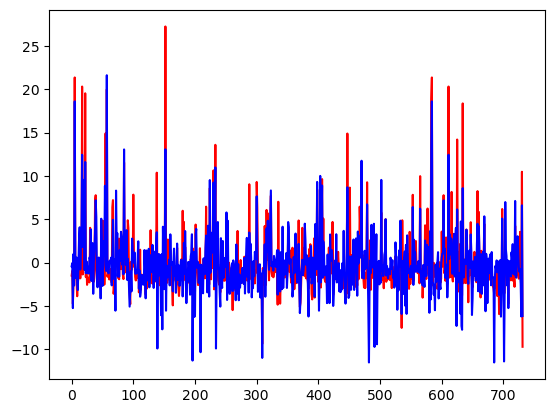

Predicted ROI -1.4280485604895548
Actual ROI -0.4731872970854924
AURIONPRO
             Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
date                                                                            
2015-01-01  266.15  255.92  80901.0  2.070418e+12  2427.0             26145.0   
2015-01-02  270.05  271.04  27916.0  7.566355e+11   922.0             15684.0   
2015-01-03  255.55  262.31  29981.0  7.864305e+11   727.0             19573.0   
2015-01-04  255.55  262.31  29981.0  7.864305e+11   727.0             19573.0   
2015-01-05  255.55  262.31  29981.0  7.864305e+11   727.0             19573.0   

              Returns  
date                   
2015-01-01  13.448423  
2015-01-02   0.764925  
2015-01-03  -4.645522  
2015-01-04  -4.645522  
2015-01-05  -4.645522  
Epoch 1/10
69/69 [==============================] - 5s 11ms/step - loss: 15.0925
Epoch 2/10
69/69 [==============================] - 1s 11ms/step - loss: 14.6255
Epoch 3/10
69/69 [=========

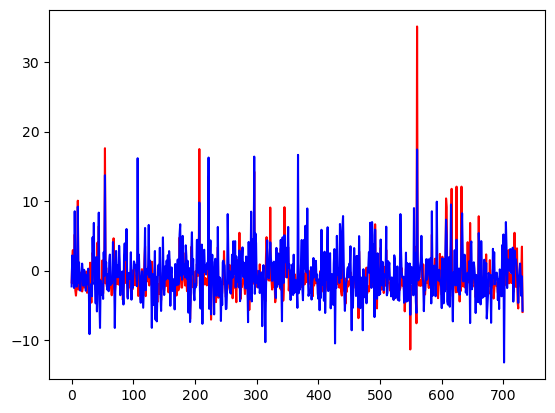

Predicted ROI -1.8046808465794748
Actual ROI -0.8973778247521249
AURUM
            Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                          
2015-01-01  337.9  334.68  653562  2.187311e+13   14818              180068   
2015-01-02  337.9  334.68  653562  2.187311e+13   14818              180068   
2015-01-03  337.9  334.68  653562  2.187311e+13   14818              180068   
2015-01-04  337.9  334.68  653562  2.187311e+13   14818              180068   
2015-01-05  337.9  334.68  653562  2.187311e+13   14818              180068   

             Returns  
date                  
2015-01-01  4.322322  
2015-01-02  4.322322  
2015-01-03  4.322322  
2015-01-04  4.322322  
2015-01-05  4.322322  
Epoch 1/10
69/69 [==============================] - 5s 11ms/step - loss: 9.0141
Epoch 2/10
69/69 [==============================] - 1s 11ms/step - loss: 7.7301
Epoch 3/10
69/69 [==============================] - 1s

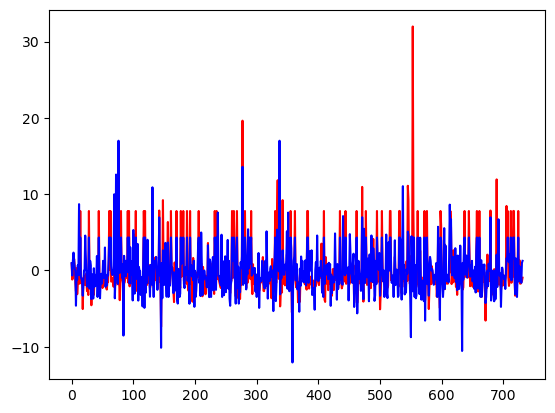

Predicted ROI -1.2329715898924984
Actual ROI -0.3536693191865605
BBOX
            Close   VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                         
2015-01-01  81.35  80.68    3603  2.907057e+10      20                 456   
2015-01-02  80.40  81.02    5937  4.810107e+10     154                3237   
2015-01-03  81.25  81.96    8477  6.947966e+10     114                7207   
2015-01-04  81.25  81.96    8477  6.947966e+10     114                7207   
2015-01-05  81.25  81.96    8477  6.947966e+10     114                7207   

             Returns  
date                  
2015-01-01  3.367217  
2015-01-02 -3.654883  
2015-01-03 -1.215805  
2015-01-04 -1.215805  
2015-01-05 -1.215805  
Epoch 1/10
69/69 [==============================] - 5s 11ms/step - loss: 15.8652
Epoch 2/10
69/69 [==============================] - 1s 11ms/step - loss: 15.5502
Epoch 3/10
69/69 [==============================] - 1s 11ms/

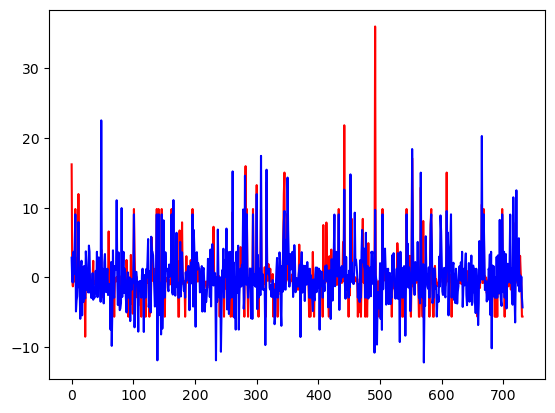

Predicted ROI -0.5884277746895323
Actual ROI -0.16720283064109503
DUCON
            Close  VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                        
2015-01-01    2.8  2.79  5602.0  1.562260e+09     9.0              5601.0   
2015-01-02    2.9  2.82  3684.0  1.039600e+09     9.0              2600.0   
2015-01-03    2.9  2.85  7118.0  2.031770e+09    17.0              4500.0   
2015-01-04    2.9  2.85  7118.0  2.031770e+09    17.0              4500.0   
2015-01-05    2.9  2.85  7118.0  2.031770e+09    17.0              4500.0   

             Returns  
date                  
2015-01-01  3.703704  
2015-01-02  1.754386  
2015-01-03  9.433962  
2015-01-04  9.433962  
2015-01-05  9.433962  
Epoch 1/10
69/69 [==============================] - 5s 11ms/step - loss: 18.4796
Epoch 2/10
69/69 [==============================] - 1s 11ms/step - loss: 18.1125
Epoch 3/10
69/69 [==============================] - 1s 11ms/step 

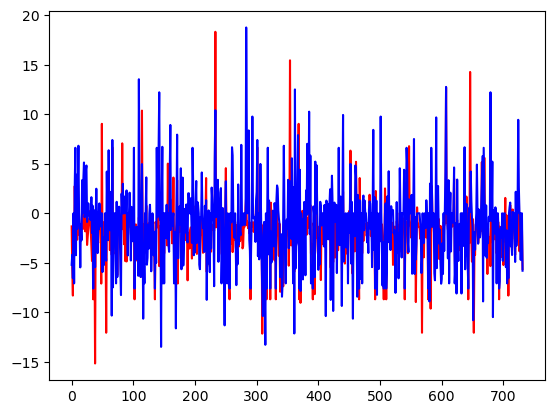

Predicted ROI -1.420777305350282
Actual ROI -0.46942546942546814
HCL-INSYS
            Close   VWAP     Volume      Turnover   Trades  \
date                                                         
2015-01-01  54.55  54.29  4514907.0  2.451247e+13  21541.0   
2015-01-02  55.65  55.90  3660798.0  2.046341e+13  17779.0   
2015-01-03  56.10  56.45  2539381.0  1.433574e+13  12895.0   
2015-01-04  56.10  56.45  2539381.0  1.433574e+13  12895.0   
2015-01-05  56.10  56.45  2539381.0  1.433574e+13  12895.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01           1080961.0  5.922330  
2015-01-02           1165710.0  1.366120  
2015-01-03            793582.0  0.357782  
2015-01-04            793582.0  0.357782  
2015-01-05            793582.0  0.357782  
Epoch 1/10
69/69 [==============================] - 5s 11ms/step - loss: 10.2033
Epoch 2/10
69/69 [==============================] - 1s 14ms/step - loss: 9.6825
Epoch 3/10
69/69 [==========

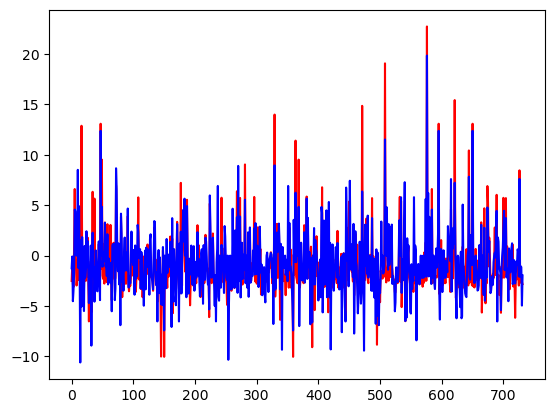

Predicted ROI -1.9631005137525448
Actual ROI -1.0395055325034577
HCLTECH
              Close     VWAP    Volume      Turnover   Trades  \
date                                                            
2015-01-01  1606.80  1604.76  334123.0  5.361862e+13  14239.0   
2015-01-02  1605.25  1608.73  233343.0  3.753864e+13  12194.0   
2015-01-03  1578.25  1586.98  503156.0  7.985004e+13  28045.0   
2015-01-04  1578.25  1586.98  503156.0  7.985004e+13  28045.0   
2015-01-05  1578.25  1586.98  503156.0  7.985004e+13  28045.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01            180691.0  0.487805  
2015-01-02            127793.0  0.199744  
2015-01-03            281694.0 -2.275542  
2015-01-04            281694.0 -2.275542  
2015-01-05            281694.0 -2.275542  
Epoch 1/10
69/69 [==============================] - 5s 11ms/step - loss: 2.5096
Epoch 2/10
69/69 [==============================] - 1s 11ms/step - loss: 2.5064
Epoch 3/10

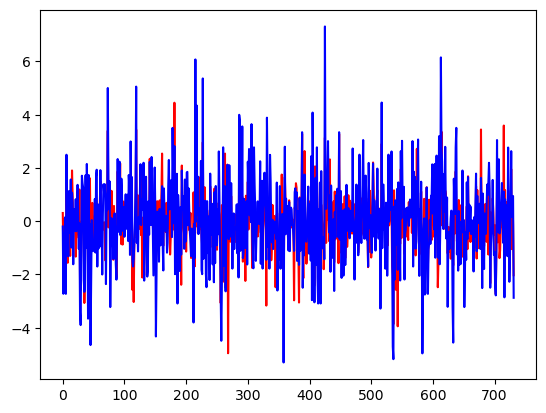

Predicted ROI -0.06800296690500733
Actual ROI 0.04188152788698557
HEXAWARE
             Close    VWAP     Volume      Turnover   Trades  \
date                                                           
2015-01-01  200.95  201.36   635129.0  1.278888e+13   6867.0   
2015-01-02  204.25  203.76  1524208.0  3.105730e+13  17765.0   
2015-01-03  204.20  205.63  1591261.0  3.272108e+13  15064.0   
2015-01-04  204.20  205.63  1591261.0  3.272108e+13  15064.0   
2015-01-05  204.20  205.63  1591261.0  3.272108e+13  15064.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01            168680.0  0.349563  
2015-01-02            585540.0  1.415094  
2015-01-03            615977.0 -0.195503  
2015-01-04            615977.0 -0.195503  
2015-01-05            615977.0 -0.195503  
Epoch 1/10
50/50 [==============================] - 5s 11ms/step - loss: 5.6208
Epoch 2/10
50/50 [==============================] - 1s 11ms/step - loss: 5.5933
Epoch 3/10
50/5

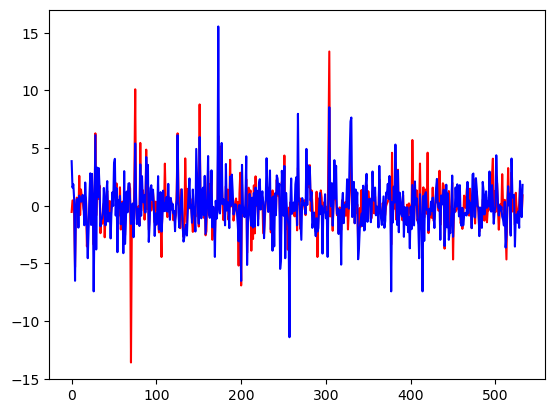

Predicted ROI -0.04623929692447365
Actual ROI -0.0882742386346951
HGS
             Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                           
2015-01-01  632.70  635.71  7729.0  4.913432e+11   464.0              4943.0   
2015-01-02  639.95  639.84  8502.0  5.439938e+11   311.0              6548.0   
2015-01-03  642.35  644.37  4949.0  3.189004e+11   261.0              2979.0   
2015-01-04  642.35  644.37  4949.0  3.189004e+11   261.0              2979.0   
2015-01-05  642.35  644.37  4949.0  3.189004e+11   261.0              2979.0   

             Returns  
date                  
2015-01-01 -0.830721  
2015-01-02  1.257911  
2015-01-03 -0.248466  
2015-01-04 -0.248466  
2015-01-05 -0.248466  
Epoch 1/10
69/69 [==============================] - 5s 11ms/step - loss: 6.0957
Epoch 2/10
69/69 [==============================] - 1s 11ms/step - loss: 5.9616
Epoch 3/10
69/69 [==============================

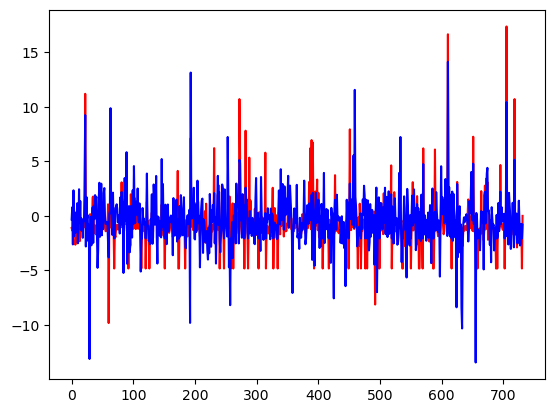

Predicted ROI -1.1074985137056244
Actual ROI -0.47303349040640286
HOVS
             Close    VWAP    Volume      Turnover  Trades  \
date                                                         
2015-01-01  149.65  150.20   14992.0  2.251745e+11   624.0   
2015-01-02  152.35  155.67  120256.0  1.872061e+12  2907.0   
2015-01-03  150.60  152.75   28370.0  4.333527e+11   717.0   
2015-01-04  150.60  152.75   28370.0  4.333527e+11   717.0   
2015-01-05  150.60  152.75   28370.0  4.333527e+11   717.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01              6045.0  1.802721  
2015-01-02             35567.0  0.894040  
2015-01-03             16657.0 -0.297915  
2015-01-04             16657.0 -0.297915  
2015-01-05             16657.0 -0.297915  
Epoch 1/10
69/69 [==============================] - 5s 11ms/step - loss: 14.3207
Epoch 2/10
69/69 [==============================] - 1s 11ms/step - loss: 13.3945
Epoch 3/10
69/69 [=============

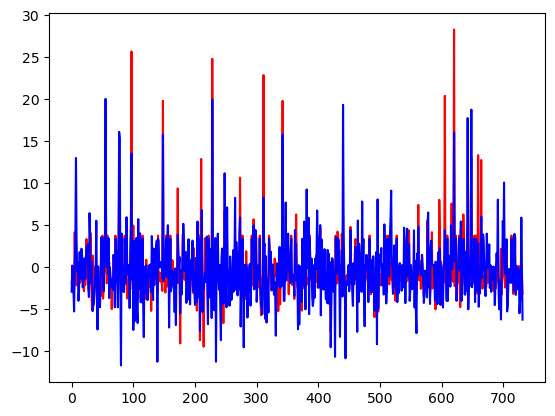

Predicted ROI -1.4710396883746015
Actual ROI -0.3343239688676356
INFOBEAN
            Close   VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                         
2015-01-01   65.3  68.05    8470  5.763681e+10     229                6509   
2015-01-02   65.3  68.05    8470  5.763681e+10     229                6509   
2015-01-03   65.3  68.05    8470  5.763681e+10     229                6509   
2015-01-04   65.3  68.05    8470  5.763681e+10     229                6509   
2015-01-05   65.3  68.05    8470  5.763681e+10     229                6509   

             Returns  
date                  
2015-01-01 -5.362319  
2015-01-02 -5.362319  
2015-01-03 -5.362319  
2015-01-04 -5.362319  
2015-01-05 -5.362319  
Epoch 1/10
69/69 [==============================] - 5s 11ms/step - loss: 15.9264
Epoch 2/10
69/69 [==============================] - 1s 11ms/step - loss: 9.8092
Epoch 3/10
69/69 [==============================] - 1s 11

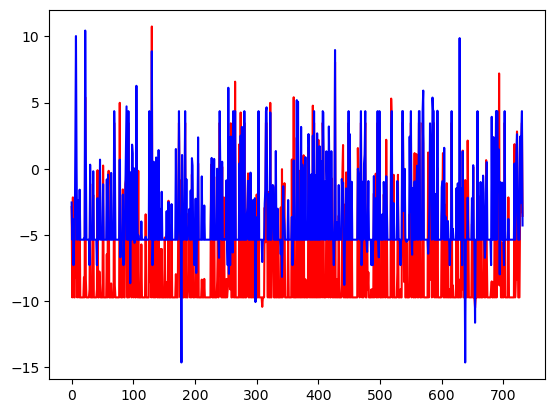

Predicted ROI -9.723050264169682
Actual ROI -5.362318840579714
INFY
             Close     VWAP     Volume      Turnover   Trades  \
date                                                            
2015-01-01  1974.4  1971.34   500691.0  9.870306e+13  14908.0   
2015-01-02  2013.2  2003.25  1694580.0  3.394669e+14  54166.0   
2015-01-03  1995.9  2004.59  2484256.0  4.979911e+14  82694.0   
2015-01-04  1995.9  2004.59  2484256.0  4.979911e+14  82694.0   
2015-01-05  1995.9  2004.59  2484256.0  4.979911e+14  82694.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01            258080.0  0.276797  
2015-01-02           1249104.0  2.089249  
2015-01-03           1830962.0 -0.696552  
2015-01-04           1830962.0 -0.696552  
2015-01-05           1830962.0 -0.696552  
Epoch 1/10
69/69 [==============================] - 5s 12ms/step - loss: 2.1511
Epoch 2/10
69/69 [==============================] - 1s 12ms/step - loss: 2.1450
Epoch 3/10
69/6

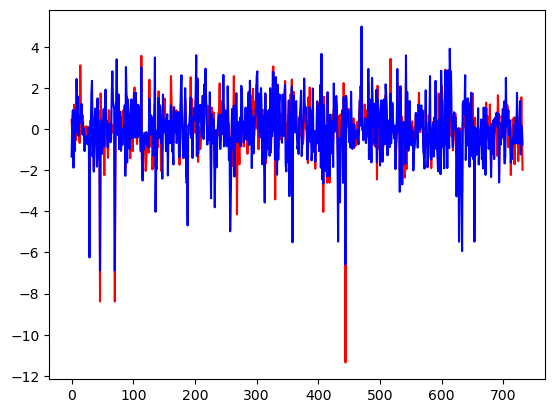

Predicted ROI -0.01323716493179497
Actual ROI -0.031065575289290298
INSPIRISYS
            Close   VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                         
2015-01-01  95.10  92.19    2998  2.763910e+10     178                1453   
2015-01-02  99.00  99.23   15525  1.540551e+11     211                8405   
2015-01-03  96.95  98.22    6359  6.245509e+10      77                3952   
2015-01-04  96.95  98.22    6359  6.245509e+10      77                3952   
2015-01-05  96.95  98.22    6359  6.245509e+10      77                3952   

             Returns  
date                  
2015-01-01  7.457627  
2015-01-02  5.882353  
2015-01-03 -2.070707  
2015-01-04 -2.070707  
2015-01-05 -2.070707  
Epoch 1/10
69/69 [==============================] - 6s 14ms/step - loss: 15.4224
Epoch 2/10
69/69 [==============================] - 1s 15ms/step - loss: 15.2374
Epoch 3/10
69/69 [==============================] -

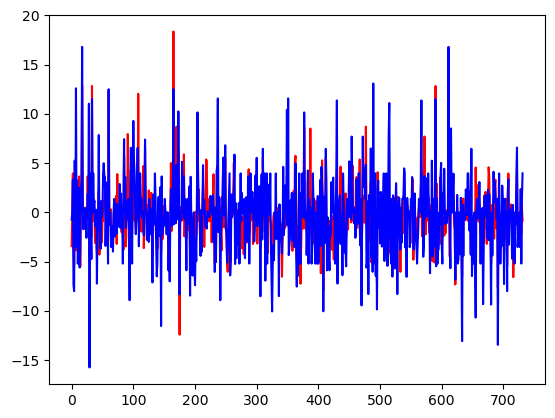

Predicted ROI -0.4818904561800343
Actual ROI 0.0
MASTEK
             Close    VWAP    Volume      Turnover   Trades  \
date                                                          
2015-01-01  399.05  401.05  709510.0  2.845507e+13  15006.0   
2015-01-02  401.45  404.39  793088.0  3.207169e+13  15965.0   
2015-01-03  403.80  405.33  566736.0  2.297170e+13  10589.0   
2015-01-04  403.80  405.33  566736.0  2.297170e+13  10589.0   
2015-01-05  403.80  405.33  566736.0  2.297170e+13  10589.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01            164202.0  0.719334  
2015-01-02            172859.0  0.312344  
2015-01-03            185457.0 -0.012381  
2015-01-04            185457.0 -0.012381  
2015-01-05            185457.0 -0.012381  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 10.7178
Epoch 2/10
69/69 [==============================] - 1s 12ms/step - loss: 9.8370
Epoch 3/10
69/69 [======================

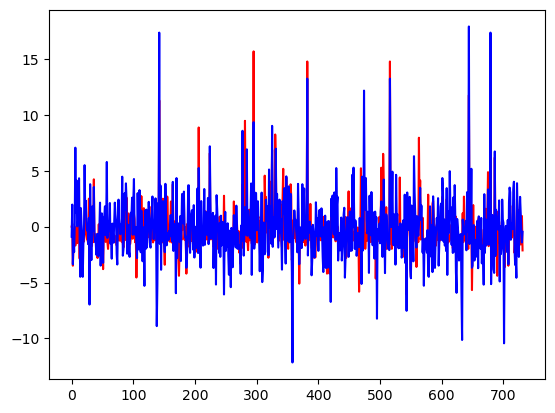

Predicted ROI -0.977887263200238
Actual ROI -0.23818899594043824
MPHASIS
             Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
date                                                                            
2015-01-01  391.65  390.41  45594.0  1.780034e+12  1686.0             19566.0   
2015-01-02  390.10  391.63  46665.0  1.827550e+12  2060.0             30113.0   
2015-01-03  391.45  386.60  72549.0  2.804780e+12  5197.0             44613.0   
2015-01-04  391.45  386.60  72549.0  2.804780e+12  5197.0             44613.0   
2015-01-05  391.45  386.60  72549.0  2.804780e+12  5197.0             44613.0   

             Returns  
date                  
2015-01-01  0.953731  
2015-01-02  0.000000  
2015-01-03  0.115090  
2015-01-04  0.115090  
2015-01-05  0.115090  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 4.1574
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 4.1490
Epoch 3/10
69/69 [====================

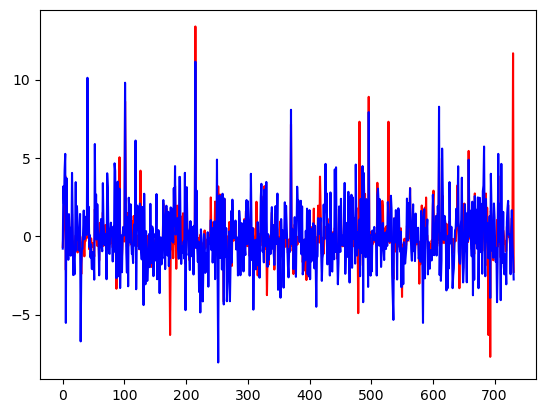

Predicted ROI -0.2605287361117341
Actual ROI -0.22108798674193475
NEWGEN
            Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
date                                                                            
2015-01-01  252.4  257.14  14008351  3.602164e+14  271016             5011328   
2015-01-02  252.4  257.14  14008351  3.602164e+14  271016             5011328   
2015-01-03  252.4  257.14  14008351  3.602164e+14  271016             5011328   
2015-01-04  252.4  257.14  14008351  3.602164e+14  271016             5011328   
2015-01-05  252.4  257.14  14008351  3.602164e+14  271016             5011328   

             Returns  
date                  
2015-01-01 -0.669028  
2015-01-02 -0.669028  
2015-01-03 -0.669028  
2015-01-04 -0.669028  
2015-01-05 -0.669028  
Epoch 1/10
69/69 [==============================] - 6s 15ms/step - loss: 5.8151
Epoch 2/10
69/69 [==============================] - 1s 14ms/step - loss: 5.6658
Epoch 3/10
69/69 [====================

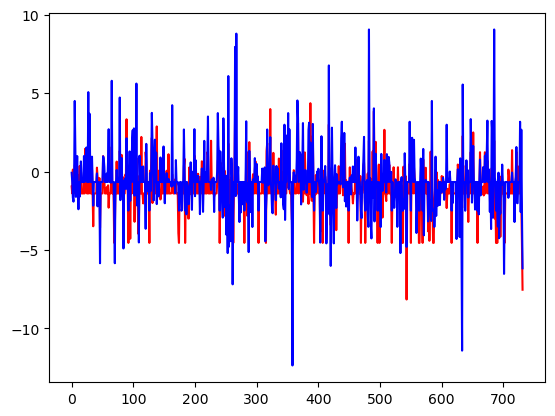

Predicted ROI -1.398234950218989
Actual ROI -0.66902794175521
OFSS
              Close     VWAP    Volume      Turnover  Trades  \
date                                                           
2015-01-01  3357.65  3354.12   10782.0  3.616407e+12  1135.0   
2015-01-02  3411.15  3377.83  343426.0  1.160034e+14  2707.0   
2015-01-03  3405.60  3446.19   35442.0  1.221399e+13  2881.0   
2015-01-04  3405.60  3446.19   35442.0  1.221399e+13  2881.0   
2015-01-05  3405.60  3446.19   35442.0  1.221399e+13  2881.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01              6669.0 -0.010423  
2015-01-02            324088.0  2.099671  
2015-01-03             16770.0  0.297453  
2015-01-04             16770.0  0.297453  
2015-01-05             16770.0  0.297453  
Epoch 1/10
69/69 [==============================] - 6s 13ms/step - loss: 2.9317
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 2.9077
Epoch 3/10
69/69 [=====

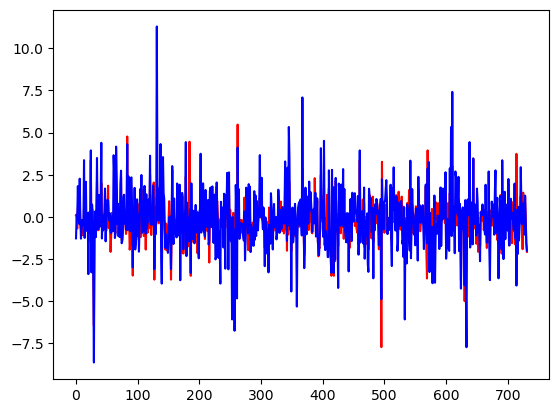

Predicted ROI -0.22729294977587602
Actual ROI -0.21859793530989186
ONWARDTEC
            Close   VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                         
2015-01-01   55.5  55.56   149.0  8.277800e+08    11.0               140.0   
2015-01-02   56.4  55.08  4610.0  2.539330e+10    56.0              2893.0   
2015-01-03   55.0  55.43  2103.0  1.165655e+10    16.0              1395.0   
2015-01-04   55.0  55.43  2103.0  1.165655e+10    16.0              1395.0   
2015-01-05   55.0  55.43  2103.0  1.165655e+10    16.0              1395.0   

             Returns  
date                  
2015-01-01 -0.892857  
2015-01-02  3.202196  
2015-01-03 -3.508772  
2015-01-04 -3.508772  
2015-01-05 -3.508772  
Epoch 1/10
69/69 [==============================] - 5s 12ms/step - loss: 15.8102
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 15.2946
Epoch 3/10
69/69 [==============================] - 1

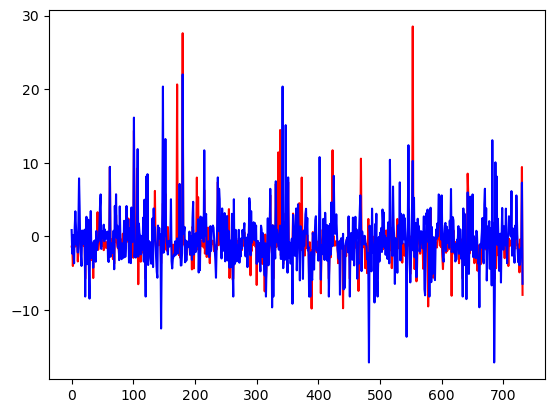

Predicted ROI -1.1375720278516752
Actual ROI -0.6122512718363784
PALREDTEC
             Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                           
2015-01-01  116.35  115.59    7531  8.705168e+10     171                4714   
2015-01-02  116.35  115.59    7531  8.705168e+10     171                4714   
2015-01-03  116.35  115.59    7531  8.705168e+10     171                4714   
2015-01-04  116.35  115.59    7531  8.705168e+10     171                4714   
2015-01-05  116.35  115.59    7531  8.705168e+10     171                4714   

             Returns  
date                  
2015-01-01 -4.552912  
2015-01-02 -4.552912  
2015-01-03 -4.552912  
2015-01-04 -4.552912  
2015-01-05 -4.552912  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 21.8807
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 21.4067
Epoch 3/10
69/69 [=======================

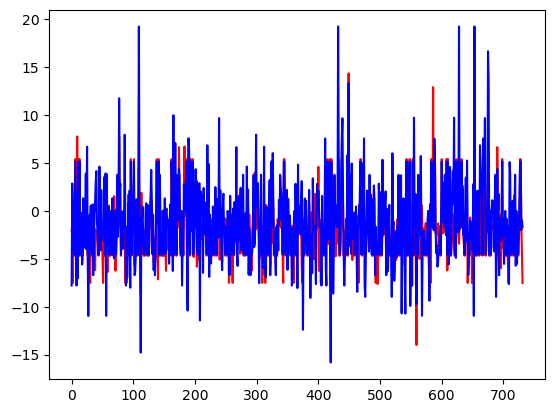

Predicted ROI -2.034542112377717
Actual ROI -1.6599190283400784
PANACHE
            Close   VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                         
2015-01-01  54.55  54.59   19134  1.044538e+11     153               18985   
2015-01-02  54.55  54.59   19134  1.044538e+11     153               18985   
2015-01-03  54.55  54.59   19134  1.044538e+11     153               18985   
2015-01-04  54.55  54.59   19134  1.044538e+11     153               18985   
2015-01-05  54.55  54.59   19134  1.044538e+11     153               18985   

             Returns  
date                  
2015-01-01 -0.091575  
2015-01-02 -0.091575  
2015-01-03 -0.091575  
2015-01-04 -0.091575  
2015-01-05 -0.091575  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 6.7536
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 6.6467
Epoch 3/10
69/69 [==============================] - 1s 13ms/

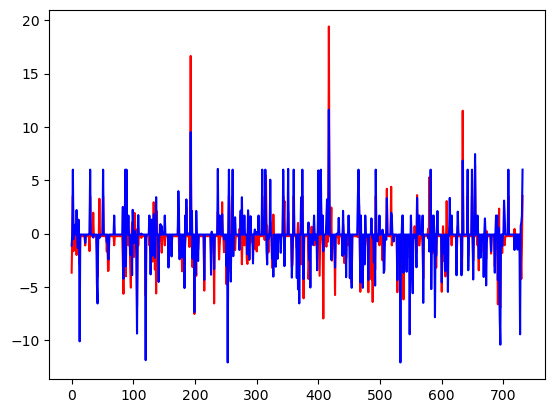

Predicted ROI -0.24460312743933196
Actual ROI -0.09157509157509938
PERSISTENT
              Close     VWAP    Volume      Turnover   Trades  \
date                                                            
2015-01-01  1733.20  1715.53   44656.0  7.660866e+12   2961.0   
2015-01-02  1874.35  1855.23  167102.0  3.100131e+13  11507.0   
2015-01-03  1765.25  1784.35  121506.0  2.168096e+13  16237.0   
2015-01-04  1765.25  1784.35  121506.0  2.168096e+13  16237.0   
2015-01-05  1765.25  1784.35  121506.0  2.168096e+13  16237.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01             20954.0  4.535585  
2015-01-02             73628.0  8.094002  
2015-01-03             62009.0 -5.853333  
2015-01-04             62009.0 -5.853333  
2015-01-05             62009.0 -5.853333  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 4.5496
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 4.5308
Epoch

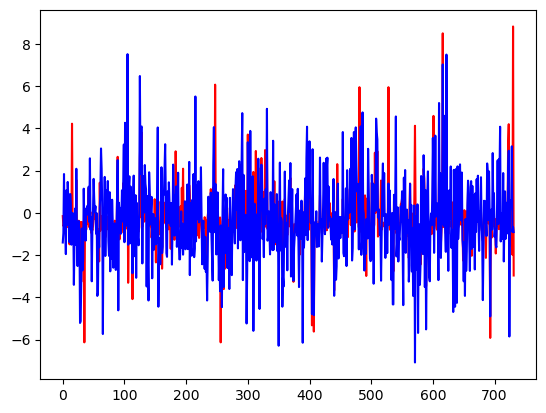

Predicted ROI -0.5195540482868533
Actual ROI -0.42333718604498183
QUICKHEAL
             Close    VWAP    Volume      Turnover  Trades  \
date                                                         
2015-01-01  253.85  291.44  22072111  6.432718e+14  321185   
2015-01-02  253.85  291.44  22072111  6.432718e+14  321185   
2015-01-03  253.85  291.44  22072111  6.432718e+14  321185   
2015-01-04  253.85  291.44  22072111  6.432718e+14  321185   
2015-01-05  253.85  291.44  22072111  6.432718e+14  321185   

            Deliverable Volume    Returns  
date                                       
2015-01-01             3404552 -16.770492  
2015-01-02             3404552 -16.770492  
2015-01-03             3404552 -16.770492  
2015-01-04             3404552 -16.770492  
2015-01-05             3404552 -16.770492  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 27.0030
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 8.4922
Epoch 3/10
69/69 [==

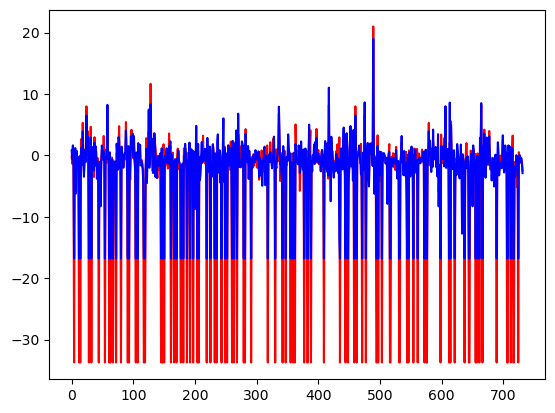

Predicted ROI -0.7894938751532572
Actual ROI -0.9249746352421704
RAMCOSYS
             Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
date                                                                            
2015-01-01  466.70  469.66   5306.0  2.491996e+11   262.0              3257.0   
2015-01-02  459.35  459.90  12857.0  5.912887e+11   387.0             10403.0   
2015-01-03  455.00  460.79  12876.0  5.933143e+11   217.0             10671.0   
2015-01-04  455.00  460.79  12876.0  5.933143e+11   217.0             10671.0   
2015-01-05  455.00  460.79  12876.0  5.933143e+11   217.0             10671.0   

             Returns  
date                  
2015-01-01 -0.691563  
2015-01-02 -0.357918  
2015-01-03 -1.086957  
2015-01-04 -1.086957  
2015-01-05 -1.086957  
Epoch 1/10
69/69 [==============================] - 6s 14ms/step - loss: 9.3728
Epoch 2/10
69/69 [==============================] - 1s 14ms/step - loss: 9.0295
Epoch 3/10
69/69 [===================

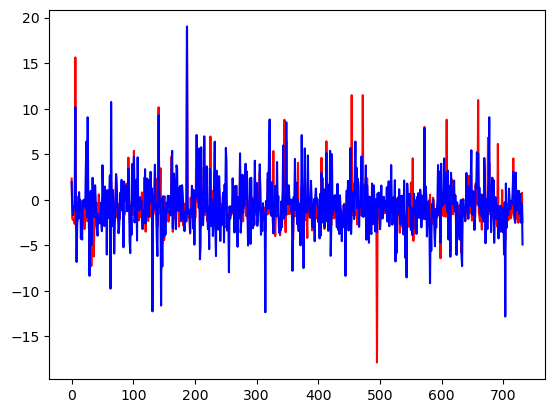

Predicted ROI -1.3988489730309235
Actual ROI -0.7314629258516989
REDINGTON
            Close    VWAP     Volume      Turnover   Trades  \
date                                                          
2015-01-01  137.0  137.30   645986.0  8.869626e+12   5678.0   
2015-01-02  138.1  139.72  1481870.0  2.070527e+13  11127.0   
2015-01-03  134.7  136.75   923765.0  1.263222e+13  10041.0   
2015-01-04  134.7  136.75   923765.0  1.263222e+13  10041.0   
2015-01-05  134.7  136.75   923765.0  1.263222e+13  10041.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01            181402.0  0.073046  
2015-01-02            620359.0  1.469508  
2015-01-03            481533.0 -2.391304  
2015-01-04            481533.0 -2.391304  
2015-01-05            481533.0 -2.391304  
Epoch 1/10
69/69 [==============================] - 6s 13ms/step - loss: 7.8673
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 7.7903
Epoch 3/10
69/69 [====

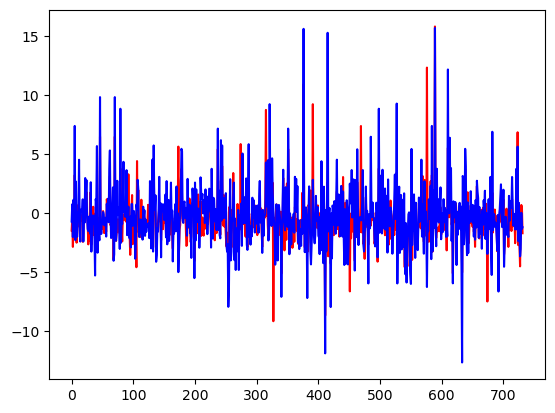

Predicted ROI -0.817925690456438
Actual ROI -0.4273136827453222
RPSGVENT
             Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                           
2015-01-01  498.75  496.71  472395  2.346429e+13   10947              229867   
2015-01-02  498.75  496.71  472395  2.346429e+13   10947              229867   
2015-01-03  498.75  496.71  472395  2.346429e+13   10947              229867   
2015-01-04  498.75  496.71  472395  2.346429e+13   10947              229867   
2015-01-05  498.75  496.71  472395  2.346429e+13   10947              229867   

             Returns  
date                  
2015-01-01  6.117021  
2015-01-02  6.117021  
2015-01-03  6.117021  
2015-01-04  6.117021  
2015-01-05  6.117021  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 15.8736
Epoch 2/10
69/69 [==============================] - 1s 12ms/step - loss: 7.5109
Epoch 3/10
69/69 [==========================

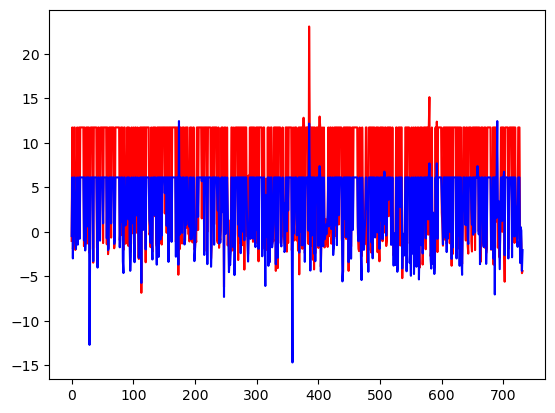

Predicted ROI 11.731557403846782
Actual ROI 6.117021276595745
RSSOFTWARE
             Close    VWAP    Volume      Turnover   Trades  \
date                                                          
2015-01-01  599.95  598.91  577357.0  3.457836e+13  17500.0   
2015-01-02  593.95  603.42  269934.0  1.628829e+13   8782.0   
2015-01-03  611.00  606.61  424551.0  2.575364e+13  14695.0   
2015-01-04  611.00  606.61  424551.0  2.575364e+13  14695.0   
2015-01-05  611.00  606.61  424551.0  2.575364e+13  14695.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01             94512.0  3.057631  
2015-01-02             83617.0 -1.663907  
2015-01-03             83867.0  2.003339  
2015-01-04             83867.0  2.003339  
2015-01-05             83867.0  2.003339  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 16.7301
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 16.0119
Epoch 3/10
69/69 [====

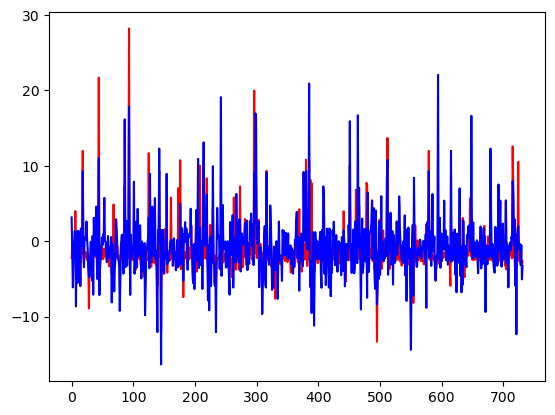

Predicted ROI -2.1582444469618673
Actual ROI -0.7909744547327118
RSYSTEMSSAKSOFT
Empty DataFrame
Columns: [Close, VWAP, Volume, Turnover, Trades, Deliverable Volume, Returns]
Index: []
SASKEN
             Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
date                                                                            
2015-01-01  228.10  226.91  32029.0  7.267668e+11   957.0             17628.0   
2015-01-02  230.45  232.76  77435.0  1.802392e+12  1941.0             30776.0   
2015-01-03  228.40  230.61  30898.0  7.125410e+11  1504.0              8502.0   
2015-01-04  228.40  230.61  30898.0  7.125410e+11  1504.0              8502.0   
2015-01-05  228.40  230.61  30898.0  7.125410e+11  1504.0              8502.0   

             Returns  
date                  
2015-01-01  0.817680  
2015-01-02  1.074561  
2015-01-03  0.816597  
2015-01-04  0.816597  
2015-01-05  0.816597  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 7.4041

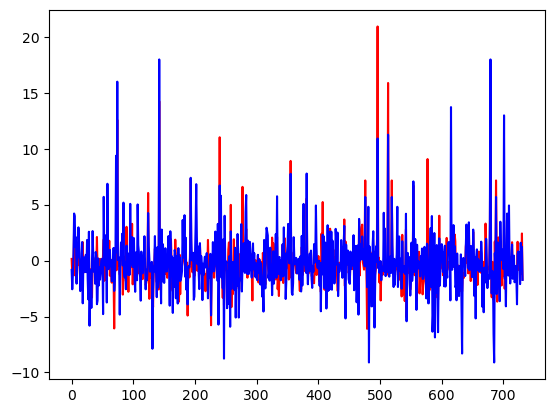

Predicted ROI -0.5927270467815497
Actual ROI -0.32718957403711546
SONATSOFTW
             Close    VWAP    Volume      Turnover  Trades  \
date                                                         
2015-01-01  128.95  128.29   88398.0  1.134060e+12  2207.0   
2015-01-02  132.15  131.99  158840.0  2.096475e+12  2338.0   
2015-01-03  129.50  131.93  153198.0  2.021084e+12  2759.0   
2015-01-04  129.50  131.93  153198.0  2.021084e+12  2759.0   
2015-01-05  129.50  131.93  153198.0  2.021084e+12  2759.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01             35672.0  3.491172  
2015-01-02            102523.0  0.877863  
2015-01-03            101808.0 -3.466269  
2015-01-04            101808.0 -3.466269  
2015-01-05            101808.0 -3.466269  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 5.9881
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 5.8056
Epoch 3/10
69/69 [=========

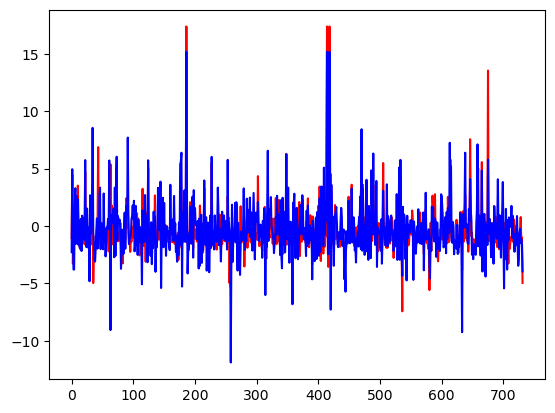

Predicted ROI -0.9997932370417808
Actual ROI -0.42184145615470015
TAKE
            Close   VWAP    Volume      Turnover  Trades  Deliverable Volume  \
date                                                                           
2015-01-01  56.60  56.67   65433.0  3.708232e+11   502.0             36516.0   
2015-01-02  62.15  60.94  806595.0  4.915669e+12  5322.0            321757.0   
2015-01-03  62.85  63.46  340352.0  2.159713e+12  2147.0            169696.0   
2015-01-04  62.85  63.46  340352.0  2.159713e+12  2147.0            169696.0   
2015-01-05  62.85  63.46  340352.0  2.159713e+12  2147.0            169696.0   

             Returns  
date                  
2015-01-01  1.615799  
2015-01-02  8.369660  
2015-01-03  0.560000  
2015-01-04  0.560000  
2015-01-05  0.560000  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 10.7288
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 10.0701
Epoch 3/10
69/69 [===========================

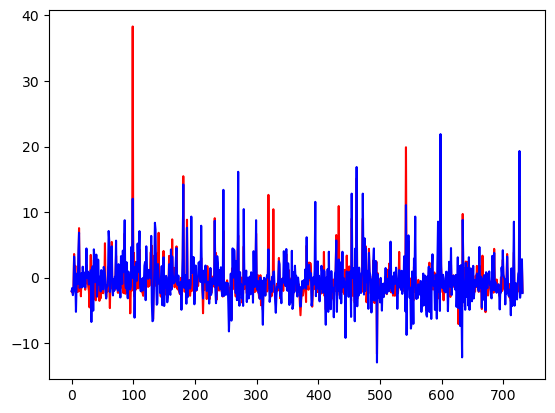

Predicted ROI -1.3042438097744236
Actual ROI -0.7806428823737215
TANLA
            Close   VWAP     Volume      Turnover  Trades  Deliverable Volume  \
date                                                                            
2015-01-01   16.8  17.11   308038.0  5.269879e+11   717.0            184674.0   
2015-01-02   17.1  17.15   426459.0  7.315148e+11  1038.0            233252.0   
2015-01-03   19.1  18.66  1406841.0  2.625113e+12  3504.0            668639.0   
2015-01-04   19.1  18.66  1406841.0  2.625113e+12  3504.0            668639.0   
2015-01-05   19.1  18.66  1406841.0  2.625113e+12  3504.0            668639.0   

              Returns  
date                   
2015-01-01   0.900901  
2015-01-02   1.483680  
2015-01-03  11.370262  
2015-01-04  11.370262  
2015-01-05  11.370262  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 11.2893
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 11.1904
Epoch 3/10
69/69 [=============

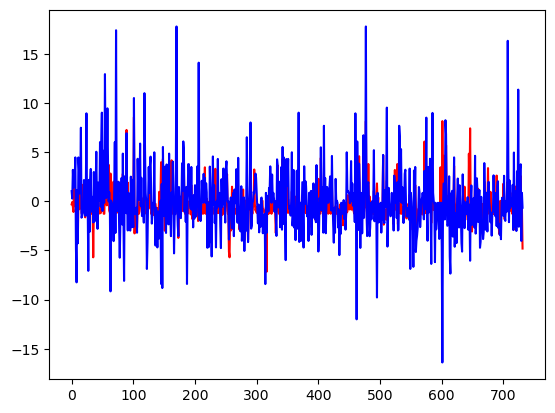

Predicted ROI -0.8104187137394132
Actual ROI -0.1447178002894274
TATAELXSI
             Close    VWAP    Volume      Turnover   Trades  \
date                                                          
2015-01-01  603.75  607.79  483959.0  2.941456e+13  12085.0   
2015-01-02  606.20  609.53  196465.0  1.197508e+13   5321.0   
2015-01-03  617.15  616.72  478829.0  2.953032e+13  12286.0   
2015-01-04  617.15  616.72  478829.0  2.953032e+13  12286.0   
2015-01-05  617.15  616.72  478829.0  2.953032e+13  12286.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01             90089.0  1.130653  
2015-01-02             58239.0 -0.197563  
2015-01-03            119623.0  2.601829  
2015-01-04            119623.0  2.601829  
2015-01-05            119623.0  2.601829  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 6.5395
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 6.3667
Epoch 3/10
69/69 [====

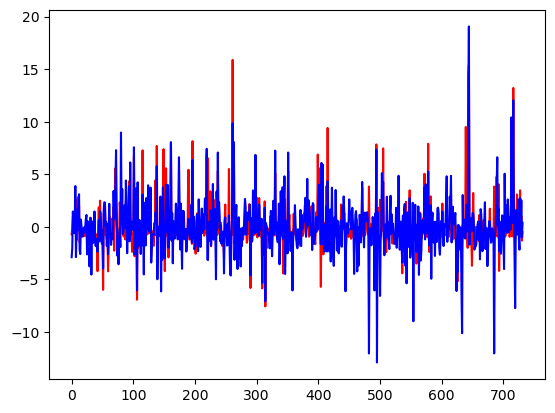

Predicted ROI -0.5539498744475617
Actual ROI -0.1849990524710275
TCS
              Close     VWAP    Volume      Turnover   Trades  \
date                                                            
2015-01-01  2545.55  2548.51  183415.0  4.674345e+13   8002.0   
2015-01-02  2579.45  2568.19  462870.0  1.188740e+14  27585.0   
2015-01-03  2540.25  2563.94  877121.0  2.248886e+14  43234.0   
2015-01-04  2540.25  2563.94  877121.0  2.248886e+14  43234.0   
2015-01-05  2540.25  2563.94  877121.0  2.248886e+14  43234.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01             52870.0 -0.835606  
2015-01-02            309350.0  1.115249  
2015-01-03            456728.0 -1.578845  
2015-01-04            456728.0 -1.578845  
2015-01-05            456728.0 -1.578845  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 1.9805
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 1.9810
Epoch 3/10
69/

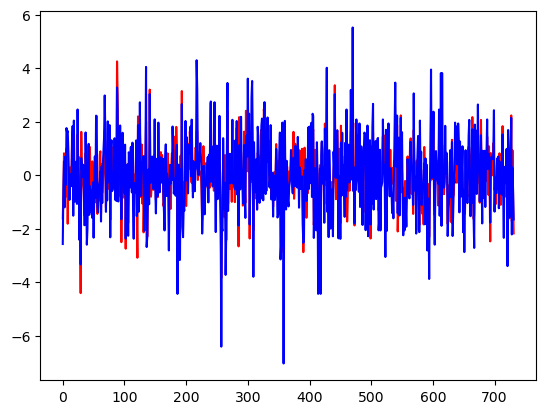

Predicted ROI -0.018166591752489636
Actual ROI -0.042120761150506766
TECHM
              Close     VWAP    Volume      Turnover   Trades  \
date                                                            
2015-01-01  2594.55  2594.38  122347.0  3.174145e+13   6691.0   
2015-01-02  2607.25  2607.24  256301.0  6.682372e+13  13186.0   
2015-01-03  2563.75  2591.04  192701.0  4.992966e+13   9924.0   
2015-01-04  2563.75  2591.04  192701.0  4.992966e+13   9924.0   
2015-01-05  2563.75  2591.04  192701.0  4.992966e+13   9924.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01             28729.0  0.214368  
2015-01-02            146869.0  0.782760  
2015-01-03            102268.0 -1.394231  
2015-01-04            102268.0 -1.394231  
2015-01-05            102268.0 -1.394231  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 3.0870
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 3.0822
Epoch 3/

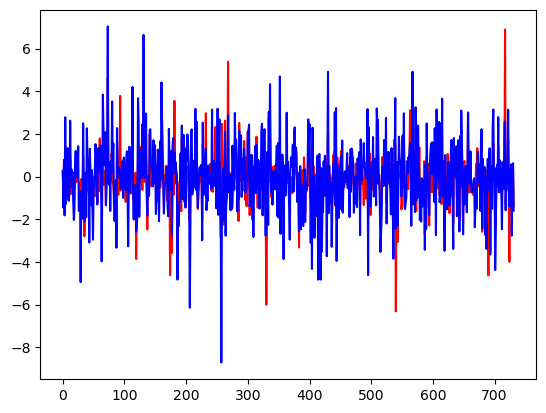

Predicted ROI -0.18563626508870035
Actual ROI 0.021373824544941813
TERASOFT
            Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                          
2015-01-01  106.2  108.83   61775  6.723244e+11    1338               32811   
2015-01-02  106.2  108.83   61775  6.723244e+11    1338               32811   
2015-01-03  106.2  108.83   61775  6.723244e+11    1338               32811   
2015-01-04  106.2  108.83   61775  6.723244e+11    1338               32811   
2015-01-05  106.2  108.83   61775  6.723244e+11    1338               32811   

             Returns  
date                  
2015-01-01 -5.976096  
2015-01-02 -5.976096  
2015-01-03 -5.976096  
2015-01-04 -5.976096  
2015-01-05 -5.976096  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 18.8157
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 15.7251
Epoch 3/10
69/69 [=============================

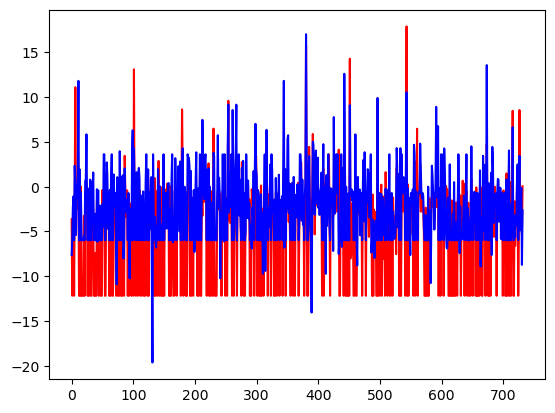

Predicted ROI -2.2687420157137277
Actual ROI -2.3605766974801696
TREJHARA
            Close   VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                         
2015-01-01   38.6  39.23  255559  1.002653e+12     751              200065   
2015-01-02   38.6  39.23  255559  1.002653e+12     751              200065   
2015-01-03   38.6  39.23  255559  1.002653e+12     751              200065   
2015-01-04   38.6  39.23  255559  1.002653e+12     751              200065   
2015-01-05   38.6  39.23  255559  1.002653e+12     751              200065   

             Returns  
date                  
2015-01-01  2.116402  
2015-01-02  2.116402  
2015-01-03  2.116402  
2015-01-04  2.116402  
2015-01-05  2.116402  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 11.2259
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 10.7633
Epoch 3/10
69/69 [==============================] - 1s 1

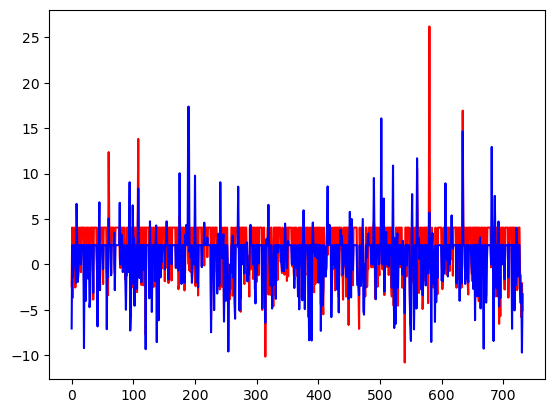

Predicted ROI 4.051952686443344
Actual ROI 2.116402116402128
TRIGYN
            Close   VWAP   Volume      Turnover  Trades  Deliverable Volume  \
date                                                                          
2015-01-01  41.60  40.82  68331.0  2.789609e+11   632.0             37454.0   
2015-01-02  40.50  41.05  44113.0  1.811046e+11   274.0             28697.0   
2015-01-03  40.95  41.29  33911.0  1.400183e+11   281.0             18215.0   
2015-01-04  40.95  41.29  33911.0  1.400183e+11   281.0             18215.0   
2015-01-05  40.95  41.29  33911.0  1.400183e+11   281.0             18215.0   

             Returns  
date                  
2015-01-01  5.449937  
2015-01-02 -2.644231  
2015-01-03 -0.967352  
2015-01-04 -0.967352  
2015-01-05 -0.967352  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 15.4761
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 15.0871
Epoch 3/10
69/69 [==============================] - 1s 

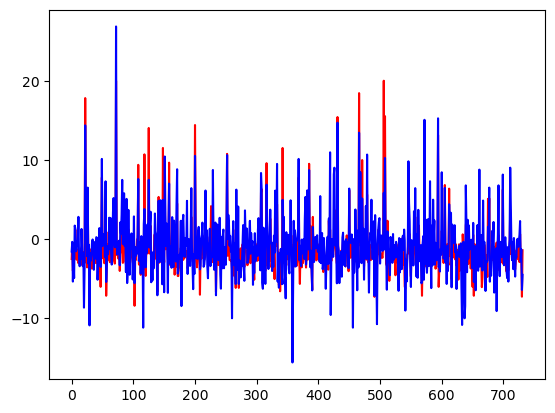

Predicted ROI -1.9085863771106357
Actual ROI -0.9493622116319318
TVSELECT
            Close   VWAP   Volume      Turnover  Trades  Deliverable Volume  \
date                                                                          
2015-01-01  42.10  42.11  15254.0  6.423694e+10   182.0              9952.0   
2015-01-02  43.65  44.00  61294.0  2.697174e+11   582.0             28886.0   
2015-01-03  43.05  43.49  22354.0  9.722670e+10   266.0             16326.0   
2015-01-04  43.05  43.49  22354.0  9.722670e+10   266.0             16326.0   
2015-01-05  43.05  43.49  22354.0  9.722670e+10   266.0             16326.0   

             Returns  
date                  
2015-01-01  1.445783  
2015-01-02  7.512315  
2015-01-03 -1.374570  
2015-01-04 -1.374570  
2015-01-05 -1.374570  
Epoch 1/10
69/69 [==============================] - 5s 14ms/step - loss: 14.3253
Epoch 2/10
69/69 [==============================] - 1s 18ms/step - loss: 13.7057
Epoch 3/10
69/69 [==============================]

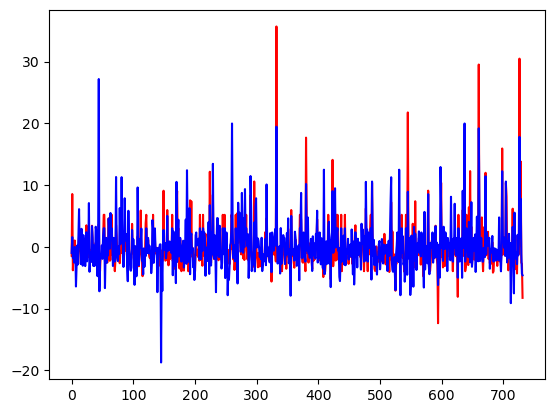

Predicted ROI -1.066268786210651
Actual ROI -0.20587013083261502
VAKRANGEE
            Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
date                                                                            
2015-01-01  124.7  125.28  108423.0  1.358338e+12  1051.0             27071.0   
2015-01-02  125.7  125.33  135063.0  1.692779e+12  1395.0             70963.0   
2015-01-03  128.7  127.79  209710.0  2.679862e+12  2168.0            131799.0   
2015-01-04  128.7  127.79  209710.0  2.679862e+12  2168.0            131799.0   
2015-01-05  128.7  127.79  209710.0  2.679862e+12  2168.0            131799.0   

             Returns  
date                  
2015-01-01  0.483481  
2015-01-02  0.239234  
2015-01-03  2.264601  
2015-01-04  2.264601  
2015-01-05  2.264601  
Epoch 1/10
69/69 [==============================] - 6s 15ms/step - loss: 11.7056
Epoch 2/10
69/69 [==============================] - 1s 15ms/step - loss: 11.3619
Epoch 3/10
69/69 [================

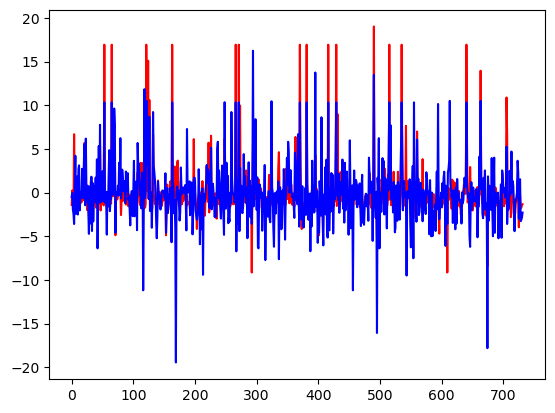

Predicted ROI -0.8187446849338931
Actual ROI -0.1552973356719325
WINPRO
            Close   VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                         
2015-01-01   56.2  56.41  147350  8.312649e+11     237              110608   
2015-01-02   56.2  56.41  147350  8.312649e+11     237              110608   
2015-01-03   56.2  56.41  147350  8.312649e+11     237              110608   
2015-01-04   56.2  56.41  147350  8.312649e+11     237              110608   
2015-01-05   56.2  56.41  147350  8.312649e+11     237              110608   

             Returns  
date                  
2015-01-01 -3.103448  
2015-01-02 -3.103448  
2015-01-03 -3.103448  
2015-01-04 -3.103448  
2015-01-05 -3.103448  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 6.7084
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 4.7803
Epoch 3/10
69/69 [==============================] - 1s 13ms/

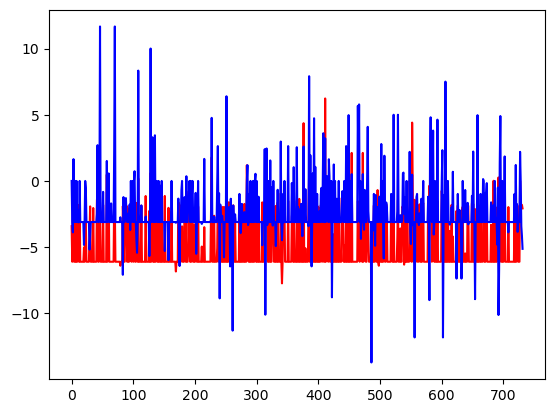

Predicted ROI -6.101052051702492
Actual ROI -3.103448275862064
WIPRO
            Close    VWAP    Volume      Turnover   Trades  \
date                                                         
2015-01-01  552.4  552.70  202978.0  1.121859e+13   4196.0   
2015-01-02  557.3  557.56  787304.0  4.389680e+13  18950.0   
2015-01-03  558.3  559.97  719738.0  4.030309e+13  20731.0   
2015-01-04  558.3  559.97  719738.0  4.030309e+13  20731.0   
2015-01-05  558.3  559.97  719738.0  4.030309e+13  20731.0   

            Deliverable Volume   Returns  
date                                      
2015-01-01             74801.0 -0.027147  
2015-01-02            423949.0  0.704734  
2015-01-03            397047.0  0.224396  
2015-01-04            397047.0  0.224396  
2015-01-05            397047.0  0.224396  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 2.2525
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 2.2487
Epoch 3/10
69/69 [=================

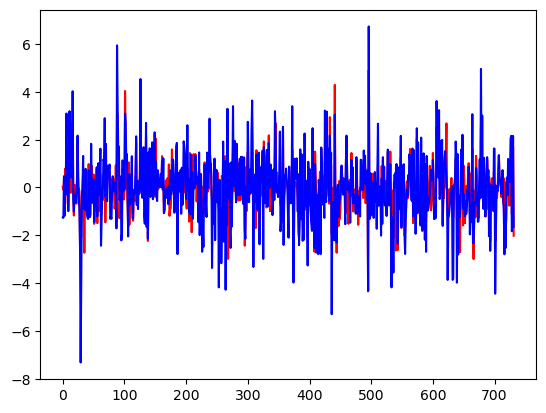

Predicted ROI -0.08334210527788594
Actual ROI -0.08790376850606091
XCHANGING
            Close   VWAP   Volume      Turnover  Trades  Deliverable Volume  \
date                                                                          
2015-01-01   39.8  39.82   1226.0  4.882210e+09    15.0              1200.0   
2015-01-02   40.3  41.37  57624.0  2.383735e+11   460.0             35526.0   
2015-01-03   40.2  40.38   5492.0  2.217940e+10    76.0              4661.0   
2015-01-04   40.2  40.38   5492.0  2.217940e+10    76.0              4661.0   
2015-01-05   40.2  40.38   5492.0  2.217940e+10    76.0              4661.0   

             Returns  
date                  
2015-01-01  0.251889  
2015-01-02  0.248756  
2015-01-03 -2.663438  
2015-01-04 -2.663438  
2015-01-05 -2.663438  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 12.8327
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 12.6815
Epoch 3/10
69/69 [============================

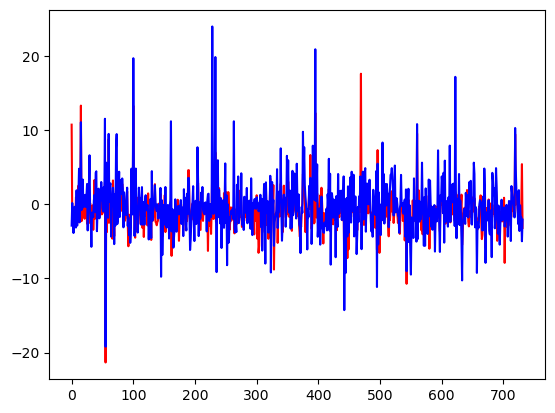

Predicted ROI -1.1819764450941639
Actual ROI -0.5177727897081925
XELPMOC
            Close   VWAP  Volume      Turnover  Trades  Deliverable Volume  \
date                                                                         
2015-01-01  83.35  89.89   71741  6.448642e+11    1049               42717   
2015-01-02  83.35  89.89   71741  6.448642e+11    1049               42717   
2015-01-03  83.35  89.89   71741  6.448642e+11    1049               42717   
2015-01-04  83.35  89.89   71741  6.448642e+11    1049               42717   
2015-01-05  83.35  89.89   71741  6.448642e+11    1049               42717   

              Returns  
date                   
2015-01-01 -18.043265  
2015-01-02 -18.043265  
2015-01-03 -18.043265  
2015-01-04 -18.043265  
2015-01-05 -18.043265  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 116.3281
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 63.8571
Epoch 3/10
69/69 [==============================]

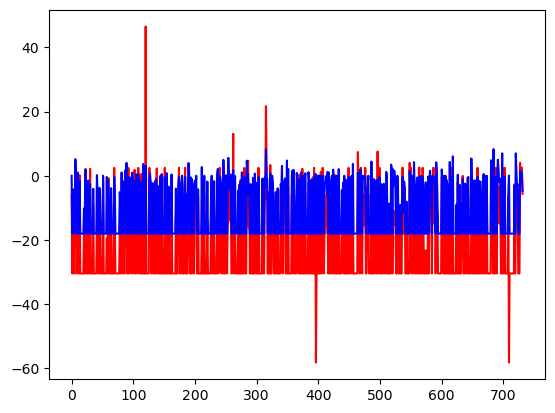

Predicted ROI -30.460518555059906
Actual ROI -18.043264503441502
ZENSARTECH
            Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
date                                                                           
2015-01-01  605.9  609.82  14141.0  8.623496e+11   737.0              6727.0   
2015-01-02  612.8  610.90  17890.0  1.092896e+12   776.0             11375.0   
2015-01-03  602.4  605.09  16341.0  9.887837e+11   775.0             10323.0   
2015-01-04  602.4  605.09  16341.0  9.887837e+11   775.0             10323.0   
2015-01-05  602.4  605.09  16341.0  9.887837e+11   775.0             10323.0   

             Returns  
date                  
2015-01-01 -0.509031  
2015-01-02  0.508447  
2015-01-03 -2.334630  
2015-01-04 -2.334630  
2015-01-05 -2.334630  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 7.0119
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 6.9237
Epoch 3/10
69/69 [========================

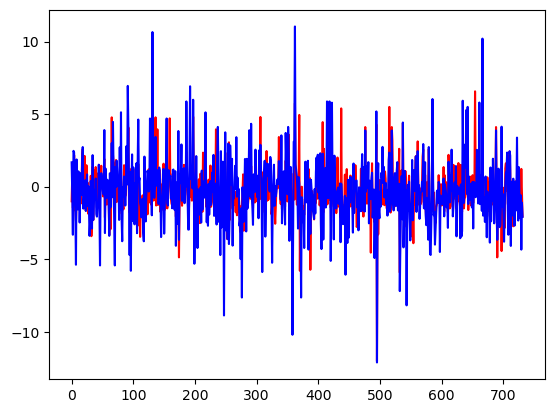

Predicted ROI -0.7724490894314214
Actual ROI -0.3326308394801534
ZENTEC
            Close   VWAP   Volume      Turnover  Trades  Deliverable Volume  \
date                                                                          
2015-01-01   55.0  54.47  59509.0  3.241371e+11   590.0             26227.0   
2015-01-02   55.0  54.47  59509.0  3.241371e+11   590.0             26227.0   
2015-01-03   55.0  54.47  59509.0  3.241371e+11   590.0             26227.0   
2015-01-04   55.0  54.47  59509.0  3.241371e+11   590.0             26227.0   
2015-01-05   55.0  54.47  59509.0  3.241371e+11   590.0             26227.0   

              Returns  
date                   
2015-01-01  12.244898  
2015-01-02  12.244898  
2015-01-03  12.244898  
2015-01-04  12.244898  
2015-01-05  12.244898  
Epoch 1/10
69/69 [==============================] - 5s 13ms/step - loss: 16.7893
Epoch 2/10
69/69 [==============================] - 1s 13ms/step - loss: 16.7123
Epoch 3/10
69/69 [==========================

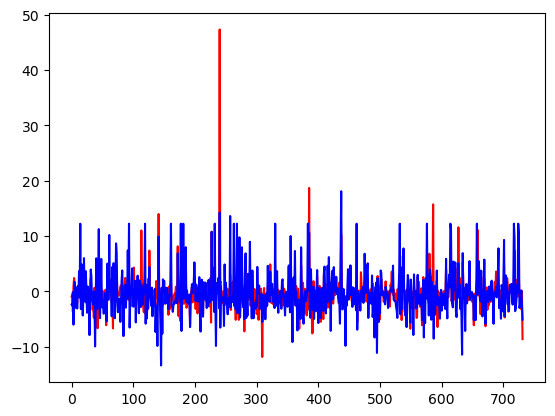

Predicted ROI -0.4876912509783913
Actual ROI -0.7143873960332738


In [14]:
sc = StandardScaler()

mm = MinMaxScaler()

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import xgboost as xg

for i in IT:
    
    print (i)
    symbol=i
    
    #getting the data from NSE
    data = get_history(symbol=symbol, start=start, end=end)
    #plt.plot(data['Close'])
    
    #making the index of the data to DateTime
    data.index = pd.to_datetime(data.index)
    
    data=preprocess(data)
    #data = data.drop(columns = ["date"])
    
    #print(data.info())
    
    x = data.iloc[:,:-1].values
    y = data.iloc[:,-1].values
    
    
    #print("Y",len(y))
    #print("X",len(x))
    
    if len(x)>0 and len(y)>0:
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size=0.25)

        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

        model = LSTM_model()
        model.compile(optimizer='adam', 
                  loss='mean_squared_error')

        checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                                   verbose = 2, 
                                   save_best_only = True)

        model.fit(x_train, y_train, epochs=10, batch_size = 32, callbacks = [checkpointer])

        lr = LinearRegression()

        lr.fit(x_train,y_train)
        #xgb_r = xg.XGBRegressor(objective ='reg:linear',
                      #n_estimators = 10, seed = 123)

        # Fitting the model
        #xgb_r.fit(x_train, y_train)

        # Predict the model
        #y_pred = xgb_r.predict(x_test)

        # RMSE Computation
        #rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        #print("RMSE : % f" %(rmse))


        #rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(x_train, y_train)

        y_pred_linear = lr.predict(x_test)

        y_pred_lstm = model.predict(x_test)

        y_pred_lstm = np.reshape(y_pred_lstm,y_pred_lstm.shape[0])

        y_pred = y_pred_linear + y_pred_lstm

        plt.plot(y_pred,c="red")
        plt.plot(y_test,c="blue")
        plt.show()

        print("Predicted ROI", np.median(y_pred))
        print("Actual ROI", np.median(y_test))
    
    #plt.plot(data)
    #plt.show()
    
    #print(data.shape)

In [74]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    
def decompose(ts_data):
    decompose = seasonal_decompose(ts_data)

    trend= decompose.trend
    season = decompose.seasonal
    
    return trend,season

    #plt.subplot(211)
    #plt.plot(trend)
    #plt.subplot(212)
    #plt.plot(season)
    
def make_stationary(ts_data):
    ts_data_new = ts_data-  ts_data.shift(2)
    ts_data_new.dropna(inplace=True)
    return ts_data_new
    

### Seasonality etc lol 

In [105]:
symbol = "SBIN"
start_date = date(2022,1,5)
end_date = date(2023,1,1)

data = get_history(symbol=symbol,start = start_date,end=end_date)

data.info()

high = data["High"].copy()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 2022-01-05 to 2022-12-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              246 non-null    object 
 1   Series              246 non-null    object 
 2   Prev Close          246 non-null    float64
 3   Open                246 non-null    float64
 4   High                246 non-null    float64
 5   Low                 246 non-null    float64
 6   Last                246 non-null    float64
 7   Close               246 non-null    float64
 8   VWAP                246 non-null    float64
 9   Volume              246 non-null    int64  
 10  Turnover            246 non-null    float64
 11  Trades              246 non-null    int64  
 12  Deliverable Volume  246 non-null    int64  
 13  %Deliverble         246 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 28.8+ KB


In [119]:
y = high.iloc[:200].copy()
y

Date
2022-01-05    495.00
2022-01-06    494.40
2022-01-07    501.95
2022-01-10    504.95
2022-01-11    507.80
               ...  
2022-10-19    563.45
2022-10-20    556.80
2022-10-21    565.80
2022-10-24    572.50
2022-10-25    586.20
Name: High, Length: 200, dtype: float64

C:\Users\Srivatsan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Srivatsan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Srivatsan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Srivatsan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters f

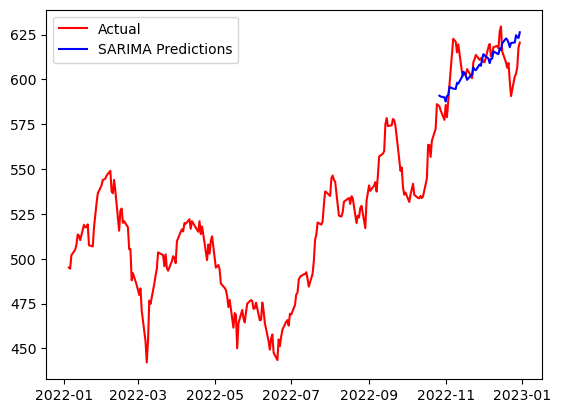

In [134]:
from statsmodels.tsa.statespace.sarimax import SARIMAX



SARIMAXmodel = SARIMAX(y, order = (2,1,2), seasonal_order=(2,1,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(46)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = high.index[200:]
#y_pred_df.index = high.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(high,color="Red",label = "Actual")
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()


### Time Series Predicted Data vs Actual Data 

In [25]:
actual_data = get_history(symbol = "INFY",start = date(2022,9,1),end = date(2022,11,30))
actual_data["Returns"] = ((actual_data["Close"]-actual_data["Open"])/actual_data["Open"])*100
actual_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Returns
Date,,,,,,,,,,,,,,,
2022-09-01,INFY,EQ,1492.95,1460.05,1468.10,1451.05,1467.00,1464.20,1460.62,8140604,1.189030e+15,319918,5886083,0.7231,0.284237
2022-09-02,INFY,EQ,1464.20,1478.00,1478.00,1448.00,1452.95,1453.00,1456.40,5175653,7.537835e+14,199570,3067071,0.5926,-1.691475
2022-09-05,INFY,EQ,1453.00,1451.00,1467.00,1446.35,1461.25,1461.30,1459.87,3669352,5.356763e+14,133172,2344738,0.6390,0.709855
2022-09-06,INFY,EQ,1461.30,1461.30,1470.00,1445.45,1456.65,1455.10,1456.32,3428442,4.992913e+14,129028,2036640,0.5940,-0.424280
2022-09-07,INFY,EQ,1455.10,1440.00,1465.75,1438.05,1462.00,1457.65,1453.03,3600574,5.231731e+14,137578,1812558,0.5034,1.225694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,INFY,EQ,1583.15,1589.00,1636.00,1584.75,1635.00,1629.80,1614.88,5282215,8.530167e+14,154105,3050333,0.5775,2.567653
2022-11-25,INFY,EQ,1629.80,1631.40,1644.00,1613.80,1630.05,1635.65,1627.35,4563255,7.426019e+14,181147,2585653,0.5666,0.260512
2022-11-28,INFY,EQ,1635.65,1628.00,1653.50,1620.00,1621.20,1623.40,1637.55,3825766,6.264902e+14,144926,2086038,0.5453,-0.282555


In [34]:
predicted_data = pd.read_csv("infy_predicted.csv")
predicted_data
predicted_data.set_index("date",inplace=True)

In [27]:
actual_data.drop(columns = ["Symbol","Series","Prev Close","Open","Low","Last","VWAP","Trades","Turnover","Deliverable Volume"],inplace = True)
actual_data

,High,Close,Volume,%Deliverble,Returns
Date,,,,,
2022-09-01,1468.10,1464.20,8140604,0.7231,0.284237
2022-09-02,1478.00,1453.00,5175653,0.5926,-1.691475
2022-09-05,1467.00,1461.30,3669352,0.6390,0.709855
2022-09-06,1470.00,1455.10,3428442,0.5940,-0.424280
2022-09-07,1465.75,1457.65,3600574,0.5034,1.225694
...,...,...,...,...,...
2022-11-24,1636.00,1629.80,5282215,0.5775,2.567653
2022-11-25,1644.00,1635.65,4563255,0.5666,0.260512
2022-11-28,1653.50,1623.40,3825766,0.5453,-0.282555


In [28]:
l = ["Volume","Close","High","%Deliverble","Returns"]
actual_data = actual_data[l]
actual_data

,Volume,Close,High,%Deliverble,Returns
Date,,,,,
2022-09-01,8140604,1464.20,1468.10,0.7231,0.284237
2022-09-02,5175653,1453.00,1478.00,0.5926,-1.691475
2022-09-05,3669352,1461.30,1467.00,0.6390,0.709855
2022-09-06,3428442,1455.10,1470.00,0.5940,-0.424280
2022-09-07,3600574,1457.65,1465.75,0.5034,1.225694
...,...,...,...,...,...
2022-11-24,5282215,1629.80,1636.00,0.5775,2.567653
2022-11-25,4563255,1635.65,1644.00,0.5666,0.260512
2022-11-28,3825766,1623.40,1653.50,0.5453,-0.282555


In [32]:
actual_x = actual_data.iloc[:,:-1].values
actual_y = actual_data.iloc[:,-1].values

actual_x = sc.fit_transform(actual_x)

demo = LinearRegression()

demo.fit(actual_x,actual_y)

model = LSTM_model()
model.compile(optimizer='adam', 
                  loss='mean_squared_error')
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                                   verbose = 2, 
                                   save_best_only = True)

model.fit(actual_x, actual_y, epochs=10, batch_size = 32, callbacks = [checkpointer])


Epoch 1/10
2/2 [==============================] - 4s 14ms/step - loss: 1.3626
Epoch 2/10
2/2 [==============================] - 0s 16ms/step - loss: 1.3560
Epoch 3/10
2/2 [==============================] - 0s 17ms/step - loss: 1.3584
Epoch 4/10
2/2 [==============================] - 0s 20ms/step - loss: 1.3588
Epoch 5/10
2/2 [==============================] - 0s 17ms/step - loss: 1.3582
Epoch 6/10
2/2 [==============================] - 0s 15ms/step - loss: 1.3595
Epoch 7/10
2/2 [==============================] - 0s 17ms/step - loss: 1.3535
Epoch 8/10
2/2 [==============================] - 0s 23ms/step - loss: 1.3550
Epoch 9/10
2/2 [==============================] - 0s 20ms/step - loss: 1.3550
Epoch 10/10
2/2 [==============================] - 0s 15ms/step - loss: 1.3535


In [50]:
pred = predicted_data.values

pred = sc.transform(pred)
lr_pred = demo.predict(pred)
lr_pred

lstm_pred = model.predict(pred)
lstm_pred = np.reshape(lstm_pred,(lstm_pred.shape[0],))

predictions = lstm_pred + lr_pred
predictions

3/3 [==============================] - 0s 4ms/step


array([-0.20942369, -0.40439471,  0.58748962,  0.87235323,  1.88679644,
        1.58566072, -0.46613841,  0.38447734, -0.40506051, -0.17965942,
       -0.67160304,  0.30927281,  1.489531  ,  0.41015522, -0.64196567,
       -0.4610821 , -0.0536061 ,  0.40830405,  0.57140542, -1.38075418,
       -0.20433097, -2.05301168,  0.90673166, -2.00706367, -3.36459047,
       -0.51120636,  1.58314747,  1.76100346,  1.74503734,  1.76338021,
       -0.67476137, -0.15973908,  1.67590124,  1.27507934,  0.43962941,
        0.50836419,  0.63372293,  1.1967178 , -0.87355081,  0.09130857,
        0.33474988, -0.16630142, -0.03232776, -1.62409701, -0.886279  ,
       -0.05044628, -0.05802356,  0.10326296, -0.30343328, -0.7272382 ,
       -1.40572821, -3.45804194, -0.47366479, -0.04920616, -1.45958233,
       -0.53178309,  2.31210968,  1.32102968, -0.60389852,  0.33730147,
       -0.80804256, -0.8056249 , -0.08658644,  1.06929642,  0.40117571,
        0.82285739,  1.157581  ,  0.99283882, -0.26859374,  0.84

In [51]:
predicted_data["Returns"] = predictions


In [52]:
predicted_data

,Volume,Close,High,%Deliverble,Returns
date,,,,,
2022-09-01,3906934.8,1545.8477,1560.2194,0.592166,-0.209424
2022-09-02,4114482.5,1548.9090,1565.8129,0.572155,-0.404395
2022-09-03,4650271.0,1577.5140,1584.9004,0.569461,0.587490
2022-09-04,3982264.2,1594.6003,1598.7177,0.570352,0.872353
2022-09-05,3826839.5,1609.4387,1602.3046,0.616312,1.886796
...,...,...,...,...,...
2022-11-26,2821851.8,1511.8187,1556.6017,0.574681,-3.262244
2022-11-27,4503756.5,1505.5465,1515.6082,0.575896,0.270647
2022-11-28,4083034.2,1507.8306,1522.1979,0.561106,-0.150846


In [54]:
print("Actual Returns Median =",np.median(actual_data["Returns"]))
print("Predicted Returns Median =",np.median(predicted_data["Returns"]))

Actual Returns Median = -0.017814483735255064
Predicted Returns Median = -0.05044628418821524


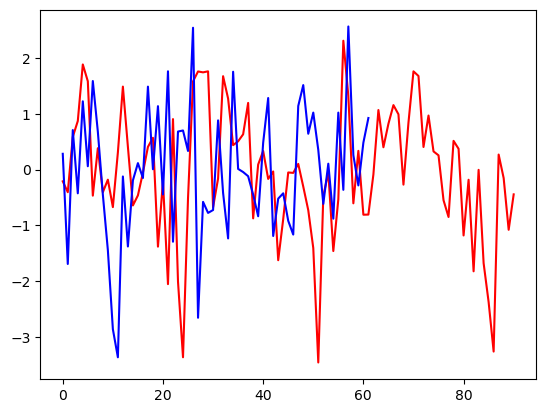

In [58]:
plt.plot(predicted_data["Returns"].values,c = "r")
plt.plot(actual_data["Returns"].values,c = "b")
plt.show()


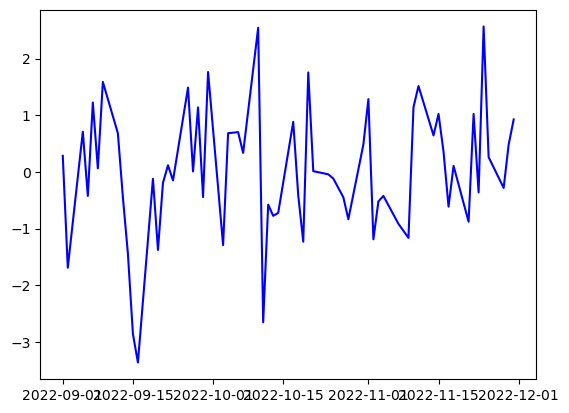

In [57]:
plt.plot(actual_data["Returns"],c = "b")
plt.show()